### Make .mat files to feed the CTW model.

`BT_ctw.mat`: shelf profiles, x and y <br>
`TSz.mat`: T0, S0, z profiles

In [1]:
import cmocean as cmo
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.io import savemat
import scipy.interpolate
import seawater as sw
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
# Distance along the coast (haversine)
def distance(lat1,lon1,lat2,lon2):
    '''Distance using Haversine formula'''
    r = 6371 #radius of Earth (KM)
    p = np.pi/180  #Pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p)) / 2
    d = 2 * r * np.arcsin(np.sqrt(a)) #2*R*asin In km
    return d


In [3]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/04_SVB_augTS_output/'
iters = np.arange(10,30,10)
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels, iters=iters)

In [4]:
lon_ind = 255
lat_ind1 = 70
lat_ind2 = 170
lon_ind_st = 10

depth = ds.Depth[:]
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360
Z = ds['Z'][:]

dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)

temp = ds['THETA'][0,:,lat_ind2+50, lon_ind_st]
salt = ds['SALT'][0,:,lat_ind2+50, lon_ind_st]

Choosing 3 shelf cross-sections and a virtual station to get T and S profiles:

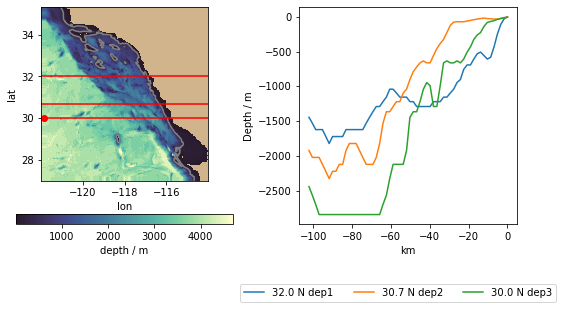

In [5]:
fig = plt.figure(figsize=(9,4))
gs = GridSpec(1, 2, width_ratios=[1,1], wspace=0.3, figure=fig)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.set_facecolor('tan')
pc = ax1.pcolormesh(lon,lat,np.ma.masked_array(depth, mask=mask_dep), cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, ax=ax1, orientation='horizontal', fraction=0.05)
cn2 = ax1.contour(lon,lat,depth, colors='0.5', levels=[250])

# cross-shelf sections
ax1.plot(lon[:],lat[lat_ind2+50]*np.ones_like(lon),'r-')
ax1.plot(lon[:],lat[lat_ind2+100]*np.ones_like(lon),'r-')
ax1.plot(lon[:],lat[lat_ind2+200]*np.ones_like(lon),'r-')
ax1.plot(lon[lon_ind_st], lat[lat_ind2+50],'ro')
cb.set_label('depth / m')
ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)

# Cross-shelf bathymetry profiles
coast_ind1 = int(np.argmax(-depth[lat_ind2+200,:].data))
dist1 = 111*(lon[:coast_ind1]-lon[coast_ind1-1])
dep1 = -depth[lat_ind2+200,:coast_ind1]

#dist_array = np.zeros(len(lon[:coast_ind1]))
#for kk in range(1,len(lon[:coast_ind1])):
#    lat1 = lat[lat_ind2+50]
#    lon1 = lon[kk-1]
#    lat2 = lat[lat_ind2+50]
#    lon2 = lon[kk]
#    dist_array[kk]=  distance(lat1, lon1, lat2, lon2)
#dist1 = np.cumsum(dist_array)
#dist1 = 111*(lon[:]-lon[-1])
#dep1 = -depth[lat_ind2+200,:]
ax2.plot(dist1[-60:],dep1[-60:], label='%1.1f N dep1' %lat[lat_ind2+200])

coast_ind2 = int(np.argmax(-depth[lat_ind2+100,:].data))
dist2 = 111*(lon[:coast_ind2]-lon[coast_ind2-1])
dep2 = -depth[lat_ind2+100,:coast_ind2]
#dist2 = 111*(lon[:]-lon[-1])
#dep2 = -depth[lat_ind2+100,:]
ax2.plot(dist2[-60:],dep2[-60:], label='%1.1f N dep2' %lat[lat_ind2+100])

coast_ind3 = int(np.argmax(-depth[lat_ind2+50,:].data))
dist3 = 111*(lon[:coast_ind3]-lon[coast_ind3-1])
dep3 = -depth[lat_ind2+50,:coast_ind3]

#dist3 = 111*(lon[:]-lon[-1])
#dep3 = -depth[lat_ind2+50,:]

ax2.plot(dist3[-60:],dep3[-60:], label='%1.1f N dep3' %lat[lat_ind2+50])

ax2.set_xlabel('km')
ax2.set_ylabel('Depth / m')
ax2.legend(bbox_to_anchor=(1.2,-0.25), ncol=3)


In [6]:
mdic = {"x": np.array(dist1[-60:]), "d1":-dep1[-60:], "d2":-dep2[-60:], "d3":-dep3[-60:] }
savemat("BT_domain5_ctw.mat", mdic)

[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. 

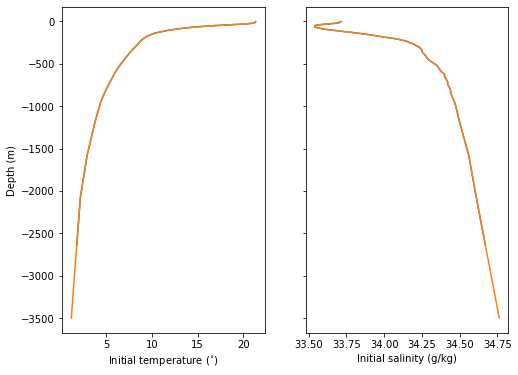

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,6), sharey=True)

ax1.plot(temp[:-2],Z[:-2])
ax2.plot(salt[:-2],Z[:-2])
ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Initial temperature ($^{\circ}$)')
ax2.set_xlabel('Initial salinity (g/kg)')

# Interp 1d
depths_interp = np.linspace(0,-3500,351)

fT = scipy.interpolate.interp1d(Z[:-2], temp[:-2],fill_value="extrapolate")
T_interp = fT(depths_interp)
 
fS = scipy.interpolate.interp1d(Z[:-2], salt[:-2],fill_value="extrapolate")
S_interp = fS(depths_interp)

ax1.plot(T_interp,depths_interp)
ax2.plot(S_interp,depths_interp)

print(depths_interp[1:]-depths_interp[0:-1])

In [8]:
mdic2 = {"z": depths_interp, "T0":T_interp, "S0":S_interp}
savemat("TSz_augTS.mat", mdic2)

In [9]:
for dis in dist1[-120:]:
    print('%1.2f,' %dis)

-206.06,
-204.33,
-202.60,
-200.87,
-199.13,
-197.40,
-195.67,
-193.94,
-192.21,
-190.48,
-188.74,
-187.01,
-185.28,
-183.55,
-181.82,
-180.09,
-178.35,
-176.62,
-174.89,
-173.16,
-171.43,
-169.70,
-167.97,
-166.23,
-164.50,
-162.77,
-161.04,
-159.31,
-157.58,
-155.84,
-154.11,
-152.38,
-150.65,
-148.92,
-147.19,
-145.45,
-143.72,
-141.99,
-140.26,
-138.53,
-136.80,
-135.06,
-133.33,
-131.60,
-129.87,
-128.14,
-126.41,
-124.68,
-122.94,
-121.21,
-119.48,
-117.75,
-116.02,
-114.29,
-112.55,
-110.82,
-109.09,
-107.36,
-105.63,
-103.90,
-102.16,
-100.43,
-98.70,
-96.97,
-95.24,
-93.51,
-91.77,
-90.04,
-88.31,
-86.58,
-84.85,
-83.12,
-81.39,
-79.65,
-77.92,
-76.19,
-74.46,
-72.73,
-71.00,
-69.26,
-67.53,
-65.80,
-64.07,
-62.34,
-60.61,
-58.87,
-57.14,
-55.41,
-53.68,
-51.95,
-50.22,
-48.48,
-46.75,
-45.02,
-43.29,
-41.56,
-39.83,
-38.10,
-36.36,
-34.63,
-32.90,
-31.17,
-29.44,
-27.71,
-25.97,
-24.24,
-22.51,
-20.78,
-19.05,
-17.32,
-15.58,
-13.85,
-12.12,
-10.39,
-8.66,
-6.93,
-5.19,
-3.46

In [10]:
for ind in [lat_ind2+50,lat_ind2+100,lat_ind2+200]:
    f=sw.f(lat[ind])
    print(f)

7.291735473901439e-05
7.441117450683225e-05
7.736716189904551e-05
